In [1]:
# SVM -Support Vector MAchines

# VECTOR
# UNDERSTANDING HYPERPLANE

# PERCEPTRON ALGORITHM

# SVM KERNELS

# SVM OPTIMIZATION

# APPLICATION OF SVM




In [2]:
# missing Values
#GET Dummies
# Label encoder
# Counter - Number

# GridSearchCV

In [3]:
# VECTOR
#Support Vectors. Support vectors are data points that are closer to the hyperplane and 
#influence the position and orientation of the hyperplane.


# hyperplane
# A hyperplane in an n-dimensional Euclidean space is a flat, 
# n-1 dimensional subset of that space that divides the space into two disconnected parts

# Perceptron algorithm
#The Perceptron algorithm is a two-class (binary) classification machine learning algorithm. 
#It is a type of neural network model, perhaps the simplest type of neural network model. 
#It consists of a single node or neuron that takes a row of data as input and predicts a class label.



In [4]:
# KERNEL
#linear, nonlinear, polynomial, Gaussian kernel, Radial basis function (RBF), sigmoid etc.

# Define kernel or a window function

#Kernel Function is a method used to take data as input and transform into the required form of processing data. 
#“Kernel” is used due to set of mathematical functions used in Support Vector Machine 

#Gaussian Kernel: It is used to perform transformation, when there is no prior knowledge about data.

#Gaussian Kernel Radial Basis Function (RBF) : 
#    Same as above kernel function, adding radial basis method to improve the transformation.

#Sigmoid Kernel: this function is equivalent to a two-layer,
#perceptron model of neural network, which is used as activation function for artificial neurons.

#Polynomial Kernel: It represents the similarity of vectors in training set of data in a 
#    feature space over polynomials of the original variables used in kernel.

# Linear Kernel: used when data is linearly separable.

In [42]:
#SVM OPTIMIZATION
# C
# Gamma

# C- It is a hypermeter in SVM to control error.
#  we have low C means low error and if we have large C means large error.

# LOW C means, not necessary for Good Descision Boundary


# Gamma is used when we use the Gaussian RBF kernel.

#if you use linear or polynomial kernel then you do not need gamma only you need C hypermeter.

# Gamma decides that how much curvature we want in a decision boundary.
# Gamma high means MORE curvature.
# Gamma low means LESS curvature.


#For choosing C we generally choose the value like 0.001, 0.01, 0.1, 1, 10, 100
#and same for Gamma 0.001, 0.01, 0.1, 1, 10, 100


#Intuitively, the gamma parameter defines how far the influence of a single training example reaches,
#with low values meaning ‘far’ and high values meaning ‘close’. 
#The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [6]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\CreditRiskTrainData.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']

print(df.head(5)) 



    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [7]:
# DATA CLREANING for MISSING VALUES
df.isnull().sum()
# find missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#df2 = df.dropna()
#print(sales2)
#print(df2.shape)

In [9]:
from collections import Counter
Counter(df['Gender'])

Counter({'Male': 489, 'Female': 112, nan: 13})

In [10]:
# Fill Empty data to Male
gender_null = df[df['Gender'].isnull()].index.tolist()
df['Gender'].iloc[gender_null] = "Male"
Counter(df['Gender'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Counter({'Male': 502, 'Female': 112})

In [11]:
Counter(df['Married'])

Counter({'No': 213, 'Yes': 398, nan: 3})

In [12]:
gender_null = df[df['Married'].isnull()].index.tolist()
df['Married'].iloc[gender_null] = "Yes"

In [13]:
Counter(df['Dependents'])

Counter({'0': 345, '1': 102, '2': 101, '3+': 51, nan: 15})

In [14]:
gender_null = df[df['Dependents'].isnull()].index.tolist()
df['Dependents'].iloc[gender_null] = "0"

In [15]:
Counter(df['Self_Employed'])

Counter({'No': 500, 'Yes': 82, nan: 32})

In [16]:
gender_null = df[df['Self_Employed'].isnull()].index.tolist()
df['Self_Employed'].iloc[gender_null] = "No"

In [17]:
df.groupby(df['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
12.0     111.000000
36.0     117.500000
60.0     140.000000
84.0     132.250000
120.0     22.333333
180.0    147.523810
240.0    118.333333
300.0    185.153846
360.0    147.245436
480.0    151.800000
Name: LoanAmount, dtype: float64

In [18]:
df['LoanAmount'][ ( df['LoanAmount'].isnull())] = 130

<ipython-input-18-16e9d55a4c1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LoanAmount'][ ( df['LoanAmount'].isnull())] = 130


In [19]:
pd.crosstab( df['LoanAmount'].isnull(), df['Loan_Amount_Term'])

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
LoanAmount,,,,,,,,,,
False,1,2,2,4,3,44,4,13,512,15


In [20]:
df['Loan_Amount_Term'][ ( df['Loan_Amount_Term'].isnull())] = 360

<ipython-input-20-1881097f4870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Amount_Term'][ ( df['Loan_Amount_Term'].isnull())] = 360


In [21]:
(df['Credit_History']).value_counts()
df['Credit_History'][ ( df['Credit_History'].isnull())] = 0

<ipython-input-21-cc1614a82fcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit_History'][ ( df['Credit_History'].isnull())] = 0


In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
dfNew2 = pd.get_dummies(df.drop(['Loan_ID'],axis=1) ,drop_first=True)
dfNew2.head()

#dfInput = dfNew.iloc[:,0:14] 
#print(dfInput.head())
#dfoutput = dfNew.iloc[:,-1]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,130.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [24]:
from sklearn import preprocessing
from sklearn import utils
# .MultiLabelBinarizer()  LabelEncoder LabelBinarizer
lab_enc = preprocessing.LabelEncoder()

In [25]:
dfClean = df.drop(['Loan_ID'], axis=1)
print(dfClean.head())


  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       130.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3 

In [26]:
#

In [27]:
# creating instance of labelencoder - BEST WAY
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dfClean['Gender_Cat'] = labelencoder.fit_transform(dfClean['Gender'])
dfClean['Married_Cat'] = labelencoder.fit_transform(dfClean['Married'])
dfClean['Education_Cat'] = labelencoder.fit_transform(dfClean['Education'])
dfClean['Self_Employed_Cat'] = labelencoder.fit_transform(dfClean['Self_Employed'])

dfClean['Property_Area_Cat'] = labelencoder.fit_transform(dfClean['Property_Area'])
dfClean['Loan_Status_Cat'] = labelencoder.fit_transform(dfClean['Loan_Status'])

# check _cat columns

In [28]:

dfClean.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Cat,Married_Cat,Education_Cat,Self_Employed_Cat,Property_Area_Cat,Loan_Status_Cat
0,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,1,0,0,0,2,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1,2,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0,2,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,2,1


In [29]:
dfClean = dfClean.query('ApplicantIncome < 10000')

from sklearn.model_selection import cross_val_score
dfInput = dfClean.iloc[:,[5,7]] 
print(dfInput.head())
dfoutput = dfClean.iloc[:,17]
print(dfoutput.head())



   ApplicantIncome  LoanAmount
0             5849       130.0
1             4583       128.0
2             3000        66.0
3             2583       120.0
4             6000       141.0
0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Cat, dtype: int32


In [30]:
#split = int(0.8*len(dfNew))
#X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dfInput,dfoutput,test_size=0.3)

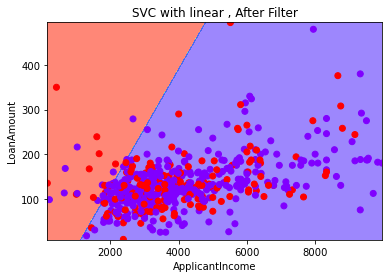

In [31]:
from sklearn import svm
C = 1.0 # SVM regularization parameter
X =  dfInput
Y =  dfoutput
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, Y)
#####################################
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100
#print(x_min, x_max, h)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#print(xx,yy)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow_r, alpha=0.6)
###################################
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.rainbow_r)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear , After Filter')
plt.show()

# more variables, more resources
# MemoryError: Unable to allocate 1.70 GiB for an array with shape (114001545, 2) and data type float64

# MemoryError: Unable to allocate 870. MiB for an array with shape (7665, 14873) and data type float64

In [32]:

# Time consuming and Resource, But, Good

#Support vector machines (SVMs) are a set of supervised learning methods 
#used for classification, regression and outliers detection.

#The advantages of support vector machines are:

#Effective in high dimensional spaces.

In [33]:
from sklearn.svm import SVC
model =SVC()
model.fit(X,Y)
pred = model.predict(X)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       172
           1       0.69      1.00      0.82       387

    accuracy                           0.69       559
   macro avg       0.35      0.50      0.41       559
weighted avg       0.48      0.69      0.57       559



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model score:: 0.6923076923076923


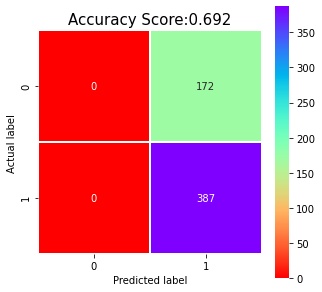

In [34]:
#print(confusion_matrix(Y_test,pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = confusion_matrix(Y , pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'rainbow_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

ms = model.score(X,Y)
print("model score::",ms)
all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


Text(0.5, 1.0, 'SVM Decision Region Boundary')

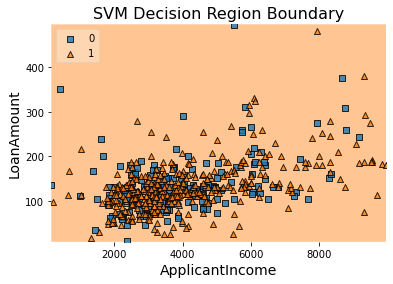

In [35]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X.values, Y.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=Y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

In [36]:
#pip install mlxtend 
#Successfully installed mlxtend-0.19.0

In [37]:
#clf.support_vectors_

#clf.support_

#clf.n_support_

In [38]:
# Get support vector indices
support_vector_indices = clf.support_
print(support_vector_indices)

[  1   7  12  16  17  19  21  22  23  27  29  30  31  34  38  46  50  51
  54  59  60  61  62  63  65  69  71  72  73  74  78  79  91 101 102 106
 111 119 124 125 127 128 135 137 138 145 146 150 152 155 157 160 162 163
 164 167 172 175 181 188 189 194 196 198 203 204 214 219 223 228 229 233
 234 235 238 244 254 259 264 266 271 272 273 278 280 286 295 298 307 309
 310 315 320 322 326 327 329 334 335 336 340 345 351 354 363 366 367 368
 371 375 376 378 380 382 383 387 389 391 396 408 409 410 411 413 418 420
 425 427 429 431 436 437 443 445 449 454 458 461 463 466 467 470 471 472
 477 484 488 491 496 498 500 503 504 512 515 516 517 519 520 521 523 528
 530 531 532 536 538 542 543 546 550 558   2   4   5  11  14  15  18  25
  26  32  33  35  36  40  41  43  44  48  49  52  53  56  67  68  75  77
  80  84  86  87  92  94  95  96  98  99 100 107 108 110 114 115 121 122
 129 132 133 134 136 140 144 149 154 156 158 161 165 166 169 171 173 174
 176 177 178 180 182 184 187 195 199 202 205 207 21

In [39]:
# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[172 192]


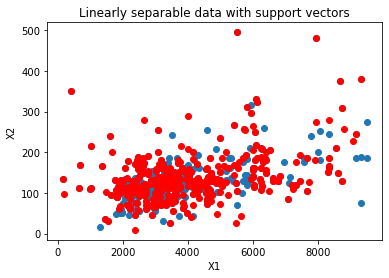

In [40]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(x_train.iloc[:,0], x_train.iloc[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# RBF - 